## Con `requests`

In [1]:
import requests
import urllib.parse

In [2]:
API_BASE_URL = "http://apis.datos.gob.ar/series/api/"

In [3]:
def get_api_call(ids, **kwargs):
    kwargs["ids"] = ",".join(ids)
    return "{}{}?{}".format(API_BASE_URL, "series", urllib.parse.urlencode(kwargs))    

In [7]:
api_call = get_api_call(["168.1_T_CAMBIOR_D_0_0_26"], start_date="2018-08")
print(api_call)

http://apis.datos.gob.ar/series/api/series?start_date=2018-08&ids=168.1_T_CAMBIOR_D_0_0_26


In [8]:
requests.get(api_call).json()

{'data': [['2018-08-01', 27.525],
  ['2018-08-02', 27.45],
  ['2018-08-03', 27.29],
  ['2018-08-04', 27.29],
  ['2018-08-05', 27.29],
  ['2018-08-06', 27.33],
  ['2018-08-07', 27.395],
  ['2018-08-08', 27.65],
  ['2018-08-09', 28.11],
  ['2018-08-10', 29.25],
  ['2018-08-11', 29.25],
  ['2018-08-12', 29.25],
  ['2018-08-13', 29.925],
  ['2018-08-14', 29.61],
  ['2018-08-15', 30.0],
  ['2018-08-16', 29.84]],
 'meta': [{'end_date': '2018-08-16',
   'frequency': 'day',
   'start_date': '2018-08-01'},
  {'catalog': {'title': 'Datos Programación Macroeconómica'},
   'dataset': {'description': 'Datos de tipo de cambio $-USD - futuro dólar . Con respecto al dólar de Estados Unidos. Frecuencia diaria.',
    'issued': '2017-09-28',
    'source': 'BCRA, MAE, Rofex y Bloomberg',
    'title': 'Tipo de Cambio $-USD - Futuro Dólar'},
   'distribution': {'downloadURL': 'http://infra.datos.gob.ar/catalog/sspm/dataset/168/distribution/168.1/download/datos-tipo-cambio-usd-futuro-dolar-frecuencia-diaria.

## Con `pandas`

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv(get_api_call(
    ["168.1_T_CAMBIOR_D_0_0_26", "101.1_I2NG_2016_M_22", "116.3_TCRMA_0_M_36", "143.3_NO_PR_2004_A_21",
     "11.3_VMATC_2004_M_12"], 
    format="csv", start_date=2016
))

In [11]:
df

,indice_tiempo,tipo_cambio_bna_vendedor,ipc_2016_nivel_general,tipo_cambio_real_multilateral_actual,indice_serie_original,construccion
0,2016-01-01,13.770968,NaN,96.037288,136.224649,141.662982
1,2016-02-01,14.927586,NaN,102.527508,134.701421,138.955923
2,2016-03-01,15.117742,NaN,102.953278,149.352475,140.656424
3,2016-04-01,14.623333,85.5254,97.192801,152.711833,126.001883
4,2016-05-01,14.329032,89.1118,91.175438,164.217485,134.256954
5,2016-06-01,14.326667,91.8528,88.988956,154.937264,128.572706
6,2016-07-01,15.104839,93.7328,92.526172,145.010287,128.647626
7,2016-08-01,15.043548,93.9221,92.525709,143.551707,144.744075
8,2016-09-01,15.273333,95.0014,92.953656,141.082192,136.889907
9,2016-10-01,15.387097,97.2428,91.703985,141.583637,127.559134


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

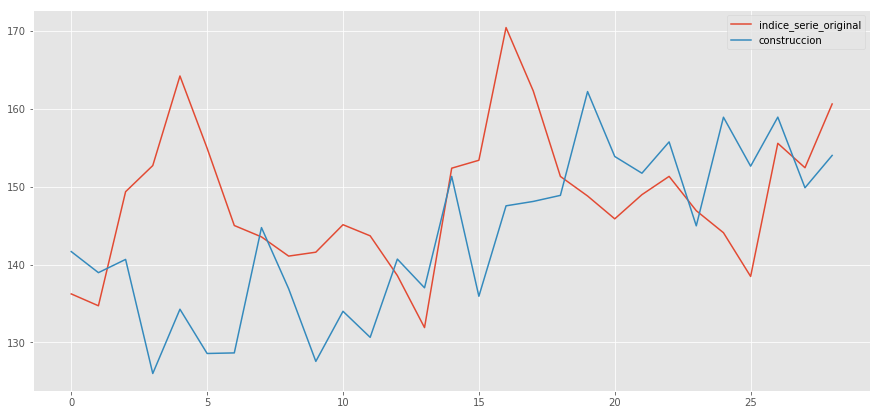

In [13]:
df[["indice_serie_original", "construccion"]].plot(figsize=(15,7))

## Con `markdown` y `pdfkit`

In [14]:
import markdown
import pdfkit

In [15]:
tipo_cambio = requests.get(get_api_call(
    ["168.1_T_CAMBIOR_D_0_0_26:avg", "168.1_T_CAMBIOR_D_0_0_26:max", "168.1_T_CAMBIOR_D_0_0_26:min"], 
    sort="desc", collapse="month", limit=13
)).json()["data"]

In [16]:
ipc = requests.get(get_api_call(
    ["101.1_I2NG_2016_M_22:percent_change", "101.1_I2NG_2016_M_22:percent_change_a_year_ago"], 
    sort="desc", collapse="month", limit=13
)).json()["data"]

In [17]:
emae = requests.get(get_api_call(
    ["143.3_NO_PR_2004_A_21", "143.3_NO_PR_2004_A_21:percent_change", "143.3_NO_PR_2004_A_21:percent_change_a_year_ago"], 
    sort="desc", collapse="month", limit=13
)).json()["data"]

In [18]:
import arrow

In [19]:
reporte = """
# Seguimiento de coyuntura

## Tipo de cambio

El tipo de cambio promedio del mes de {mes_tc:%Y-%m} fue {mes_tc_promedio:.2f} con un máximo de {mes_tc_max:.2f} 
y un mínimo de {mes_tc_min:.2f}.

## Inflación

La inflación de {mes_ipc:%Y-%m} respecto de {mes_ipc_anterior:%Y-%m} fue de {mes_ipc_var:.2%}, mientras que la inflación interanual
{mes_ipc:%Y-%m}/{mes_ipc_anio_anterior:%Y-%m} fue de {mes_ipc_var_interanual:.2%}.

## Nivel de actividad

El EMAE de {mes_emae:%Y-%m} muestra {alza_o_caida_mensual} respecto del mes anterior de {mes_emae_var:.2%}, y un 
{alza_o_caida_interanual} interanual de {mes_emae_var_interanual:.2%}.
""".format(
    mes_tc=arrow.get(tipo_cambio[1][0]).datetime,
    mes_tc_promedio=tipo_cambio[1][1],
    mes_tc_max=tipo_cambio[1][2],
    mes_tc_min=tipo_cambio[1][3],
    mes_ipc=arrow.get(ipc[0][0]).datetime,
    mes_ipc_anterior=arrow.get(ipc[1][0]).datetime,
    mes_ipc_var=ipc[0][1],
    mes_ipc_anio_anterior=arrow.get(ipc[12][0]).datetime,
    mes_ipc_var_interanual=ipc[0][2],
    mes_emae=arrow.get(emae[0][0]).datetime,
    alza_o_caida_mensual="alza" if emae[0][2] >= 0 else "caída",
    mes_emae_var=emae[0][2],
    alza_o_caida_interanual="alza" if emae[0][3] >= 0 else "caída",
    mes_emae_var_interanual=emae[0][3]
)

In [20]:
from IPython.core.display import display, HTML

In [23]:
# genera un HTML a partir del markdown
html = markdown.markdown(reporte)
display(HTML(html))

In [24]:
# genera un PDF a partir del HTML
pdfkit.from_string(html,'reporte-series-tiempo.pdf', options={"encoding": "utf8"})

Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                      


True

In [25]:
from send_email import send_email

In [26]:
send_email("Reporte de coyuntura", to="agusbenassi@gmail.com", message_html=html, files="reporte-series-tiempo.pdf")

Se envió exitosamente un reporte a agusbenassi@gmail.com
